In [2]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [52]:
from IPython.display import HTML
def View(df):
    css = """<style>
    table { border-collapse: collapse; border: 3px solid #eee; }
    table tr th:first-child { background-color: #eeeeee; color: #333; font-weight: bold }
    table thead th { background-color: #eee; color: #000; }
    tr, th, td { border: 1px solid #ccc; border-width: 1px 0 0 1px; border-collapse: collapse;
    padding: 3px; font-family: monospace; font-size: 12px }</style>
    """
    s  = '<script type="text/Javascript">'
    s += 'var win = window.open("", "Title", "toolbar=no, location=no, directories=no, status=no, menubar=no, scrollbars=yes, resizable=yes, width=780, height=200, top="+(screen.height-400)+", left="+(screen.width-840));'
    s += 'win.document.body.innerHTML = \'' + (df.to_html() + css).replace("\n",'\\') + '\';'
    s += '</script>'
    return(HTML(s+css))


## Some simple data exploration, manipulation, and analysis
1. Import data files as Pandas DataFrame
2. Data viewing
3. Select columns and rows from DataFrame
4. Simple calculations and manipulation on specific columns and rows
5. Add a new column to existing DataFrame
6. Joining data
7. Pivot table (group by)

### 1. Import data files as Pandas DataFrame
```python
df_xlsx = pd.read_excel()
df_csv = pd.read_csv()
df_sas_table = pd.read_sas()
df_sql_table = pd.read_sql()
```

In [3]:
# Import xlsx file, set the 1st row to be the header
df_fuel = pd.read_excel("fuel_type.xlsx", header=0)

# Create a datetime converter since the datetime format in original data file 
# is not standard format that can be recognized automatically
mydateparser = lambda x: pd.datetime.strptime(x, '%d%b%Y:%H:%M:%S')

# Import csv file, set 1st row to be headers, convert columns "Date_Begin_GMT" and "Date_Begin_Local" to datetime format
df_mv = pd.read_csv("Hourly-Metered-Volumes-and-Pool-Price-and-AIL-from-2008-to-2018.csv", header=0, 
                   converters = {'Date_Begin_GMT':mydateparser, 'Date_Begin_Local':mydateparser})


### 2. Data viewing
```python
first_n_rows = df.head(n)
last_n_rows = df.tail(n)
dimension = df.shape()           #Extract number fo rows and columns
summary = df.describe()
print(df)
```

In [53]:
# View the first 15 rows of Hourly_Metered_Volume DataFrame
# Set max. num. of displayed columns to 147, which is the num. of columns df_mv has, otherwise Pandas will truncate the columns
pd.set_option('display.max_columns', 150)     
df_fuel.head(3)

# View the DataFrame in a browser window
View(df_fuel)

In [51]:
df_mv.head(5)

,Date_Begin_GMT,Date_Begin_Local,AFG1,AKE1,ALS1,APS1,BCR2,BCRK,BIG,BOW1,BR3,BR4,BR5,BRA,CAL1,CCMH,CHIN,CMH1,CR1,CRW1,DAI1,DKSN,DOWG,DRW1,DV1,EAGL,EC01,EC04,ENC1,FNG1,GN1,GN2,GN3,GOC1,GPEC,GWW1,HRM,ICP1,IEW1,IOR1,JOF1,KH1,KH2,KHW1,ME02,ME03,ME04,MKR1,MKRC,NPC1,NX01,NX02,OMRH,PH1,PR1,PW01,RB1,RB2,RB3,RB5,RG10,RG8,RG9,RL1,RYMD,SCL1,SCR1,SCR2,SCR3,SD1,SD2,SD3,SD4,SD5,SD6,SH1,SH2,SHCG,ST1,ST2,TAB1,TAY1,TAY2,TC01,TC02,TLM2,UOA1,VVW1,WB4,WEY1,WST1,WWD1,WWD2,VVW2,ALP1,ALP2,CNR5,NPP1,ENC2,BTR1,CRS1,CRS2,CRS3,ENC3,MEG1,IEW2,HMT1,ARD1,NEP1,KH3,UOC1,SCR4,CRR1,HAL1,NRG3,ANC1,GEN5,BSR1,EGC1,OWF1,GEN6,IOR2,PEC1,IOR3,WCD1,NPC2,CRG1,HSM1,MFG1,NAT1,SCR5,SCR6,BUL1,BUL2,SLP1,CL01,FH1,BSC1,EXPORT_BC,EXPORT_MT,EXPORT_SK,IMPORT_BC,IMPORT_MT,IMPORT_SK,ACTUAL_POOL_PRICE,ACTUAL_AIL,DAY_AHEAD_POOL_PRICE
0,2008-01-01 07:00:00,2008-01-01 00:00:00,4.845,34.489,0.0,0.0,10.948,0.0,22.243,41.5273,149.570,149.570,382.188,0.0,0.0,0.0,0.0,9.515,37.024,30.411,1.344,4.922,89.001,0.0,0.0,23.142,12.668,65.800,0.0,20.334,380.734,383.481,449.679,3.778,16.294,61.476,103.909,0.0,53.934,49.964,98.1647,0.0,359.448,57.327,0.0,0.0,0.0,55.073,111.979,0.0,2.101,0.0,1.825,0.0,22.352,0.0,0.0,0.0,0.0,45.156,0.0,0.0,0.0,3.024,0.0,67.408,224.536,11.792,2.394,279.373,285.256,234.718,381.035,357.735,392.603,374.508,375.806,0.0,0.0,0.0,1.331,0.0,1.236,60.943,16.904,10.843,0.0,0.0,271.953,0.0,12.257,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390,NaN,0,100,NaN,0,52.92,7960.0,42.81
1,2008-01-01 08:00:00,2008-01-01 01:00:00,0.784,53.947,0.0,0.0,10.949,0.0,26.082,41.6368,150.320,149.655,382.977,0.0,0.0,0.0,0.0,0.000,32.506,24.605,1.162,4.922,67.509,0.0,0.0,23.989,1.059,66.072,0.0,20.670,380.705,384.002,450.409,3.807,16.449,64.344,106.000,0.0,57.690,50.036,97.2006,0.0,362.750,55.688,0.0,0.0,0.0,57.900,112.481,0.0,0.000,0.0,1.849,0.0,22.351,0.0,0.0,0.0,0.0,46.148,0.0,0.0,0.0,6.300,0.0,65.856,164.240,12.530,3.326,254.742,266.270,230.777,332.736,353.558,387.734,354.032,362.828,0.0,0.0,0.0,0.743,0.0,1.111,61.150,17.387,10.893,0.0,0.0,271.595,0.0,12.315,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300,NaN,0,50,NaN,50,34.97,7779.0,17.22
2,2008-01-01 09:00:00,2008-01-01 02:00:00,0.809,65.875,0.0,0.0,10.979,0.0,22.044,42.0731,148.174,147.068,344.049,0.0,0.0,0.0,0.0,0.000,24.587,28.147,2.422,4.920,67.891,0.0,0.0,24.213,0.889,66.224,0.0,20.823,380.149,384.544,450.117,3.812,15.894,67.732,96.942,0.0,57.066,50.061,96.9372,0.0,361.608,52.498,0.0,0.0,0.0,56.490,111.579,0.0,0.000,0.0,1.825,0.0,22.184,0.0,0.0,0.0,0.0,45.620,0.0,0.0,0.0,0.000,0.0,71.456,162.056,13.622,1.960,256.875,263.245,229.085,325.057,278.769,324.496,273.449,326.352,0.0,0.0,0.0,1.428,0.0,0.803,60.867,17.157,10.895,0.0,0.0,271.047,0.0,12.581,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,NaN,0,25,NaN,50,17.58,7609.0,15.80
3,2008-01-01 10:00:00,2008-01-01 03:00:00,2.974,63.796,0.0,0.0,10.943,0.0,19.261,38.8216,148.669,147.396,368.629,0.0,0.0,0.0,0.0,0.000,27.135,31.900,2.422,4.920,66.696,0.0,0.0,24.325,0.809,67.016,0.0,21.073,380.156,384.001,450.054,3.787,16.297,64.384,91.819,0.0,46.913,50.201,97.0745,0.0,362.924,43.508,0.0,0.0,0.0,58.215,111.730,0.0,0.000,0.0,1.849,0.0,22.686,0.0,0.0,0.0,0.0,45.804,0.0,0.0,0.0,1.876,0.0,67.456,161.804,14.010,5.489,256.150,261.622,231.841,316.550,280.938,323.595,312.079,315.107,0.0,0.0,0.0,2.411,0.0,1.040,60.931,16.259,10.903,0.0,0.0,271.801,0.0,12.846,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200,NaN,0,0,NaN,25,20.06,7507.0,15.80
4,2008

### 3. Data Selection

__The following 3 lines of code all extract the first COLUMN of DataFrame df:__
```python
column1 = df['column1 name']
column1 = df['column1 name'].values
column1 = df.iloc[:,0]
```

>  `df['column1 name']` returns the first column as a Series  
>  `df['column1 name'].values` returns the first column as an array that can be used to perform computation. This comes handy if you wish to do calculations  
>  `df.iloc[:,0]` extracts data from specific location. The 1st argument denotes rows, 2nd argument denotes columns. The ':' means select all, so essentially this means select all rows in first column  


__The following 2 lines of code all extract the first ROW of DataFrame df:__
```python
row1 = df.loc[0]
row1 = df.iloc[0,:]
```
> `df.loc[0]` uses the index of the DataFrame to extract rows. Similarly, `df.loc[1]` extracts the second row  
> `df.iloc[0,:]` uses the specific location to extract rows. It means select all elements in the first row

__Extract specific ELEMENT from a DataFrame:__
```python
element1 = df.iloc[0,0]
elementLast = df.iloc[len(df.index)-1, len(df.columns)-1]  
elementX = df.loc['label/index name', 'column name']               
```
> `df.iloc[0,0]` extracts the first element of the dataframe. Note that Python index starts from 0  
> `df.iloc[len(df.index)-1, len(df.columns)-1` extracts the last element of the DataFrame. `len(df.index)` and `len(df.columns)` are common ways to get the number of rows and columns in the DataFrame. Since Python index starts from 0, we need to subtract 1 to locate the last element  
> `df.loc['label/index name', 'column name']` is another way to extract specific element using label and column names, instead of numerical location 

__The following line of code creates a new DataFrame by selecting two columns from exisitng DataFrame__
```python
new_sub_df = df[['column1 name', 'column2 name']]
```

### 4. Combine and join data
```python
new_df = df1.append(df2)   
new_df = pd.concat([df1,df2], axis=1)
new_df = df1.join(df2, on='col1 name', how='inner')
new_df = df1.merge(df2, how = 'inner', left_on = 'col1 name', right_on = 'col2 name')
```
> `df1.append(df2)` combines two dataframes vertically along the rows (rows on top of rows)  
> `df1.concat([df1,df2], axis=1)` combines two dataframes horizontally along the columns. The 'axis' parameter can be changed to combine dataframes along the rows  
> `df1.join(df2, on='col1 name', how='inner')` is a simple SQL-like join. However, the joining key ('on' parameter) of the two dataframes have to be the same in order for the joining to work properly  
> `df1.merge(df2, how = 'inner', left_on = 'col1 name', right_on = 'col2 name')` is more versatile, it works similarly as df1.join() but it allows the dataframes to have different names for the joining keys  

### 5. Adding and dropping data from existing DataFrame
```python
df['new column name'] = new_data
df.insert(location, 'column name', new_data)
df.loc[index_of_new_row] = new_data
df1.append(df2)
pd.concat()
df.drop([index1, index2])
df.drop(['col1 name', 'col2 name'])
```

> `df['new column name'] = new_data` inserts a column directly on the right of an existing DataFrame df  
> `df.insert(location, 'column name', new_data]` allows you to specify a location to insert the new column  
> `df.loc[index_of_new_row] = new_data` This is a short-cut to add consecutive rows to existing DataFrame, however it's not recommened because it can easily mess up the DataFrame's index. You can also use this to replace certain rows in the DataFrame  
> `df1.append(df2)` This is a much better way to add rows to existing DataFrame. Rememeber to reset the index using `df.reset_index()` after appending (if necessary)  
> `df.drop([index1, index2])` drops rows by index 
> `df.drop(['col1 name', 'col2 name'])` drops columns by column names


### 6. Filtering, sorting, and pivoting datasets
```python
df_filtered = df[df['column name'] > 5]
df_sorted = df.sort_values(by=['col1 name', 'col2 name'], axis=0, ascending=[True,False])
df_groupby = df.groupby(by=['col name'])
df_groupby_mean = df.groupby(by=['col name']).mean()
df_pivot = pd.pivot_table(df, values='col name of value', index=['idx1 name','idx2 name'], columns=['col1 name'], aggfunc=method of aggregation)
```

> `df[df['column name'] > 5]` is like a WHERE statement in SAS. Essentially, the square brackets [] acts as a logical evaluation, the content can be an AND, OR, >, <, == statement  
> `df.sort_values()` sorts datasets based on the input of 'by' parameter  
> `df.groupby(by=['col name'])` returns a groupby object which can be used to call functions such as first(), get_group() to explore data  
> `df.groupby(by=['col name']).mean()` aggregates data by mean, works similarly as SQL group by  
> `pd.pivot_table()` returns a pivot table and is more versatile than groupby

## Let's use all of the basic concepts learned above to do some more advanced tasks:
__1. Find all CC assets and extract metered volumes of all CC assets__  
__2. Add a column of year (extracted from Date_Begin_GMT) to the Hourly_Metered_Volume table__  
__3. Find daily average spark spreads and graph the results (Fig. 3 of Annual Stats Report)__  
__4. Linear Regression for load forecasting__  

### Task 1: Find all CC assets and extract their corresponding metered volume
__*Concepts: data selection, data viewing, grouby*__  
__* Use `df.groupby()` function to categorize the assets based on fuel type__  
__* Use `get_group()` function to get the 'CC' group from the Groupby object created by previous step__  
__* Select desired columns from Metered_Volume table__

In [6]:
# Create a copy of the two imported tables so we don't mess up the original datasets
df_fuel_copy = df_fuel.copy()
df_mv_copy = df_mv.copy()

# Categorize assets based on fuel type
asset_group = df_fuel_copy.groupby(by=['TECH'])

# Extract CC assets
df_CC_asset = asset_group.get_group('CC')
print(df_CC_asset[0:5])

# Extract metered volumes of all CC assets
mv_col_names = df_mv_copy.columns                        # Create a copy of column names in Metered_Volume table
CC_asset_name = df_CC_asset['asset'].values              # Extract CC asset names
common_CC_asset = mv_col_names & CC_asset_name           # Find common asset names from the two name lists
selected_cols = np.concatenate(('Date_Begin_GMT', 'Date_Begin_Local',common_CC_asset ), axis=None)     # Choose columns that need to be selected
df_CC_mv = df_mv_copy[selected_cols]                     # Select datetime and metered volumes of CC assets
df_CC_mv.head(6)                                          # Display the output DataFrame


  asset TECH
0  CAL1   CC
1  CES1   CC
2  CES2   CC
3   CG1   CC
4   CG2   CC


,Date_Begin_GMT,Date_Begin_Local,CAL1,CMH1,EC01,FNG1,NX01,RG10,RG8,RG9,ST1,ST2,EGC1
0,2008-01-01 07:00:00,2008-01-01 00:00:00,0.0,9.515,12.668,20.334,2.101,0.0,0.0,0.0,0.0,0.0,NaN
1,2008-01-01 08:00:00,2008-01-01 01:00:00,0.0,0.000,1.059,20.670,0.000,0.0,0.0,0.0,0.0,0.0,NaN
2,2008-01-01 09:00:00,2008-01-01 02:00:00,0.0,0.000,0.889,20.823,0.000,0.0,0.0,0.0,0.0,0.0,NaN
3,2008-01-01 10:00:00,2008-01-01 03:00:00,0.0,0.000,0.809,21.073,0.000,0.0,0.0,0.0,0.0,0.0,NaN
4,2008-01-01 11:00:00,2008-01-01 04:00:00,0.0,0.000,0.775,21.059,0.000,0.0,0.0,0.0,0.0,0.0,NaN
5,2008-01-01 12:00:00,2008-01-01 05:00:00,0.0,0.000,0.774,21.143,0.000,0.0,0.0,0.0,0.0,0.0,NaN


### Task 2: Add a column of date to Hourly_Metered_Volume DataFrame
__*Concepts: Data manipulation*__  
__* Extract date from the existing column 'Date_Begin_GMT'__  
__* Insert the computed column into desired location__


In [7]:
# Extract year from each Timestamp in the column
# The attribute year is only associated with a single Timestamp, 
# if we want to extract year from all items in the column, we need to use the map method
date = [datetime.date(d) for d in df_mv_copy['Date_Begin_Local']]

# Insert the newly computed column to existing DataFrame
df_mv_copy.insert(2, 'Date_Local', date)
df_mv_copy.head(6)

,Date_Begin_GMT,Date_Begin_Local,Date_Local,AFG1,AKE1,ALS1,APS1,BCR2,BCRK,BIG,BOW1,BR3,BR4,BR5,BRA,CAL1,CCMH,CHIN,CMH1,CR1,CRW1,DAI1,DKSN,DOWG,DRW1,DV1,EAGL,EC01,EC04,ENC1,FNG1,GN1,GN2,GN3,GOC1,GPEC,GWW1,HRM,ICP1,IEW1,IOR1,JOF1,KH1,KH2,KHW1,ME02,ME03,ME04,MKR1,MKRC,NPC1,NX01,NX02,OMRH,PH1,PR1,PW01,RB1,RB2,RB3,RB5,RG10,RG8,RG9,RL1,RYMD,SCL1,SCR1,SCR2,SCR3,SD1,SD2,SD3,SD4,SD5,SD6,SH1,SH2,SHCG,ST1,ST2,TAB1,TAY1,TAY2,TC01,TC02,TLM2,UOA1,VVW1,WB4,WEY1,WST1,WWD1,WWD2,VVW2,ALP1,ALP2,CNR5,NPP1,ENC2,BTR1,CRS1,CRS2,CRS3,ENC3,MEG1,IEW2,HMT1,ARD1,NEP1,KH3,UOC1,SCR4,CRR1,HAL1,NRG3,ANC1,GEN5,BSR1,EGC1,OWF1,GEN6,IOR2,PEC1,IOR3,WCD1,NPC2,CRG1,HSM1,MFG1,NAT1,SCR5,SCR6,BUL1,BUL2,SLP1,CL01,FH1,BSC1,EXPORT_BC,EXPORT_MT,EXPORT_SK,IMPORT_BC,IMPORT_MT,IMPORT_SK,ACTUAL_POOL_PRICE,ACTUAL_AIL,DAY_AHEAD_POOL_PRICE
0,2008-01-01 07:00:00,2008-01-01 00:00:00,2008-01-01,4.845,34.489,0.0,0.0,10.948,0.0,22.243,41.5273,149.570,149.570,382.188,0.0,0.0,0.0,0.0,9.515,37.024,30.411,1.344,4.922,89.001,0.0,0.0,23.142,12.668,65.800,0.0,20.334,380.734,383.481,449.679,3.778,16.294,61.476,103.909,0.0,53.934,49.964,98.1647,0.0,359.448,57.327,0.0,0.0,0.0,55.073,111.979,0.0,2.101,0.0,1.825,0.0,22.352,0.0,0.0,0.0,0.0,45.156,0.0,0.0,0.0,3.024,0.0,67.408,224.536,11.792,2.394,279.373,285.256,234.718,381.035,357.735,392.603,374.508,375.806,0.0,0.0,0.0,1.331,0.0,1.236,60.943,16.904,10.843,0.0,0.0,271.953,0.0,12.257,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390,NaN,0,100,NaN,0,52.92,7960.0,42.81
1,2008-01-01 08:00:00,2008-01-01 01:00:00,2008-01-01,0.784,53.947,0.0,0.0,10.949,0.0,26.082,41.6368,150.320,149.655,382.977,0.0,0.0,0.0,0.0,0.000,32.506,24.605,1.162,4.922,67.509,0.0,0.0,23.989,1.059,66.072,0.0,20.670,380.705,384.002,450.409,3.807,16.449,64.344,106.000,0.0,57.690,50.036,97.2006,0.0,362.750,55.688,0.0,0.0,0.0,57.900,112.481,0.0,0.000,0.0,1.849,0.0,22.351,0.0,0.0,0.0,0.0,46.148,0.0,0.0,0.0,6.300,0.0,65.856,164.240,12.530,3.326,254.742,266.270,230.777,332.736,353.558,387.734,354.032,362.828,0.0,0.0,0.0,0.743,0.0,1.111,61.150,17.387,10.893,0.0,0.0,271.595,0.0,12.315,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300,NaN,0,50,NaN,50,34.97,7779.0,17.22
2,2008-01-01 09:00:00,2008-01-01 02:00:00,2008-01-01,0.809,65.875,0.0,0.0,10.979,0.0,22.044,42.0731,148.174,147.068,344.049,0.0,0.0,0.0,0.0,0.000,24.587,28.147,2.422,4.920,67.891,0.0,0.0,24.213,0.889,66.224,0.0,20.823,380.149,384.544,450.117,3.812,15.894,67.732,96.942,0.0,57.066,50.061,96.9372,0.0,361.608,52.498,0.0,0.0,0.0,56.490,111.579,0.0,0.000,0.0,1.825,0.0,22.184,0.0,0.0,0.0,0.0,45.620,0.0,0.0,0.0,0.000,0.0,71.456,162.056,13.622,1.960,256.875,263.245,229.085,325.057,278.769,324.496,273.449,326.352,0.0,0.0,0.0,1.428,0.0,0.803,60.867,17.157,10.895,0.0,0.0,271.047,0.0,12.581,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,NaN,0,25,NaN,50,17.58,7609.0,15.80
3,2008-01-01 10:00:00,2008-01-01 03:00:00,2008-01-01,2.974,63.796,0.0,0.0,10.943,0.0,19.261,38.8216,148.669,147.396,368.629,0.0,0.0,0.0,0.0,0.000,27.135,31.900,2.422,4.920,66.696,0.0,0.0,24.325,0.809,67.016,0.0,21.073,380.156,384.001,450.054,3.787,16.297,64.384,91.819,0.0,46.913,50.201,97.0745,0.0,362.924,43.508,0.0,0.0,0.0,58.215,111.730,0.0,0.000,0.0,1.849,0.0,22.686,0.0,0.0,0.0,0.0,45.804,0.0,0.0,0.0,1.876,0.0,67.456,161.804,14.010,5.489,256.150,261.622,231.841,316.550,280.938,323.595,312.079,315.107,0.0,0.0,0.0,2.411,0.0,1.040,60.931,16.259,10.903,0.0,0.0,271.801,0.0,12.846,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Task 3: Calculate daily average spark spread and graph the results (Fig. 3 in Annual Stats Report)
__*Concepts: File import, groupby, data calculation, manipulation, Python function declaration, plotting*__    
__* Extract columns needed for spark spread calculation__  
__* Calculate daily average pool price__  
__* Calculate spark spread using the formula: Pool_Price - (Gas_Price x 7.5)__  
__* Graph the results as a line graph using matplotlib or seaborn__  

In [35]:
# Import the gas price file
df_gas = pd.read_excel("GAS_PRICE.xlsx", header = 0)

# Convert column 'd' to datetime object for joining later
df_gas['d'] = pd.to_datetime(df_gas['d']).apply(lambda x: x.date())

# Extract the date and gas price column
df_gp = df_gas[['d','pgClose']]

# Calculate daily average pool price
df_pp = df_mv_copy.groupby(by='Date_Local')['ACTUAL_POOL_PRICE'].mean()
df_pp = df_pp.to_frame().reset_index()

# Join the two DataFrames based on the dates that pool price has (2008 to 2018); the gas price dates range from 1996 to 2019
df_join_price = df_pp.merge(df_gp, how='inner', left_on='Date_Local', right_on='d')

# Calculate daily spark spread
df_join_price['Spark_Spread'] = df_join_price['ACTUAL_POOL_PRICE'].values - (df_join_price['pgClose']*7.5)

# Clean the DataFrame
df_join_price = df_join_price.drop(['d'],axis=1)
year = df_join_price['Date_Local'].map(lambda x: x.year)
df_join_price.insert(1, 'Year_Local', year)


df_join_price.head()


,Date_Local,Year_Local,ACTUAL_POOL_PRICE,pgClose,Spark_Spread
0,2008-01-01,2008,63.580417,6.30,16.330417
1,2008-01-02,2008,45.388750,6.57,-3.886250
2,2008-01-03,2008,53.290833,6.47,4.765833
3,2008-01-04,2008,40.767083,6.55,-8.357917
4,2008-01-05,2008,33.935417,6.53,-15.039583


In [47]:
def select_data(start_year, end_year, input_df, date_col_name, year_col_name, ss_col_name):
    
#   Save the columns needed for computation as numpy arrays
    dates = input_df[date_col_name].values
    years = input_df[year_col_name].values
    ss = input_df[ss_col_name].values
    
#   Find location for first instance of start_year and last instance of end_year
    start_yr_idx = np.where(years==start_year)[0][0]
    end_yr_idx = np.where(years==end_year)[0][-1]
    
#   Based on the locations found above, extract corresponding date and spark spread data
    x = dates[start_yr_idx : end_yr_idx+1]
    y = ss[start_yr_idx : end_yr_idx+1]
    
#   Define the output of function
    return x,y
    

Text(0, 0.5, 'Spark Spread')

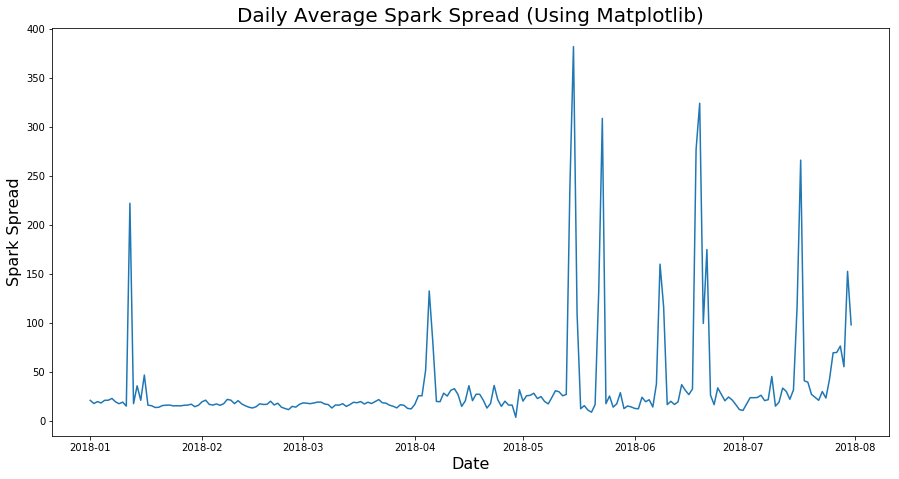

In [49]:
from pandas.plotting import register_matplotlib_converters

# Initialize the graph figure and define figure size
plt.figure(figsize=(15,7.5))

# Call function 'select_data()' to select date and spark spread in a given date range
date, spark_sp = select_data(2018, 2018, df_join_price, 'Date_Local', 'Year_Local','Spark_Spread')

# Plot the line graph: 1st argument is x-axis, 2nd argument is y-axis
plt.plot(date, spark_sp)

# Define graph title and axis titles
plt.title("Daily Average Spark Spread (Using Matplotlib)",fontsize=20)
plt.xlabel("Date",fontsize=16)
plt.ylabel("Spark Spread",fontsize=16)


### Task 4: Linear Regression for load forecasting
__*Concepts: scikit_learn (Machine Learning framework)__  
__* Import training data as regression inputs__  
__* Perform cross-validation of data__  
__* Display regression prediction results and accuracy__  

In [3]:
# Import data inputs for the linear regression model
df_input = pd.read_excel('Load_Regression_Inputs.xlsx', header=0)

# Import functions needed
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate

# Shuffle the inputs to ensure fairness of cross-validation
df_input_shuffled = df_input.copy().sample(frac=1).reset_index(drop=True)

# Select appropriate columns from the sample data to be input parameters and result
X = df_input_shuffled.drop(['DTS', 'Datetime', 'DATE', 'YEAR'], axis=1).to_numpy()
y = df_input_shuffled['DTS'].values

# Create a LinearRegression and LogisticRegression estimator
reg = LinearRegression()

# Perform cross-validation
reg_result = cross_validate(reg, X, y, cv=15)

# print accuracy score for each set of estimation
print('Linear Regression Cross-Validation Result')
print(reg_result['test_score'])


# This is the accuracy score without shuffling the input data

# [0.60431814 0.6482522  0.59492988 0.67832066 0.65890776 0.65006572
#  0.6467677  0.611259   0.65127156 0.63723904 0.6509835  0.64912504
#  0.65457799 0.47918326 0.42010689]

# Train the linear regression model
reg = reg.fit(X,y)

# Import testing data
df_test = pd.read_excel('Load_Regression_Testing_Data.xlsx', header=0)
test_data = df_test.drop(['Datetime', 'DATE', 'YEAR'], axis=1).to_numpy()
pred_DTS = reg.predict(test_data)

# Insert the DTS prediction into original DataFrame and export the results
df_test.insert(0,'Predicted_DTS', pred_DTS)

df_test.to_excel(r'Predicted_DTS.xlsx',index = None, header=True)

Linear Regression Cross-Validation Result
[0.68843915 0.69193798 0.67685508 0.68155925 0.69648989 0.68403445
 0.68665982 0.70002203 0.69571609 0.69060058 0.66980996 0.70391822
 0.6771144  0.67182093 0.68718635]


In [ ]:
# Connecting to Oracle database (but doesn't work at this moment)

import cx_Oracle
connection = cx_Oracle.connect('JESSICALI/password@edwp.aeso')
cursor = connection.cursor()
querystring = "select pr.actual_pool_price from bil.mkt_price_demand pr"
cursor.execute(querystring)